In [53]:
# Put these at the top of every notebook, to get automatic reloading and inline plotting
from IPython.core.display import display, HTML
import pandas as pd
%reload_ext autoreload
%autoreload 1
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('max_colwidth',100)    

display(HTML("<style>.container { width:95% !important; }</style>"))

import sys
import matplotlib.pyplot as plt
import seaborn as sns
import re
import json
from itertools import combinations, takewhile
import collections
import pandas as pd
import numpy as np
import os

from simhash import Simhash, SimhashIndex

sns.set()

from Utils.UtilsViz import *
from Utils.UtilsGeoViz import *

print(sys.version)

3.6.7 (default, Oct 22 2018, 11:32:17) 
[GCC 8.2.0]


In [54]:
fpath = os.path.join(os.getcwd(), "temp.csv")
tweets_df = pd.read_csv(fpath, index_col="Unnamed: 0")
display(
    tweets_df.shape,
    tweets_df.head()
)

(1048947, 20)

,id_str,text,in_reply_to_status_id_str,in_reply_to_user_id_str,created_at,user_id_str,user_name,user_followers_count,user_favourites_count,user_statuses_count,user_friends_count,coordinates,favorite_count,entities_hashtags,favorited,retweet_count,retweeted,retweeted_status_user_id_str,retweeted_status_user_name,hashtags_cleaned
0,8.778927e+17,RT @ArkansasBlog: Study: States with concealed carry laws experience rise in violent crime. http...,NaN,NaN,Thu Jun 22 14:15:01 +0000 2017,1.550783e+08,Lake Man,1554.0,56574.0,95959.0,2577.0,NaN,0.0,[],False,0.0,False,17131180,Arkansas Blog,[]
1,8.778927e+17,"IL Healthcare Truth Tour: Heal Don't Repeal! 6/22 2:30PM Federal Plaza, Chicago. Mobile billboar...",NaN,NaN,Thu Jun 22 14:15:01 +0000 2017,7.159992e+06,Annie Williams,22.0,167.0,417.0,87.0,NaN,0.0,[],False,0.0,False,NaN,NaN,[]
2,8.778927e+17,"IL Healthcare Truth Tour: Heal Don't Repeal! 6/22 2:30PM Federal Plaza, Chicago. Mobile billboar...",NaN,NaN,Thu Jun 22 14:15:01 +0000 2017,8.271887e+17,Indivisible9IL,264.0,111.0,342.0,231.0,NaN,0.0,[],False,0.0,False,NaN,NaN,[]
3,8.778927e+17,"IL Healthcare Truth Tour: Heal Don't Repeal! 6/22 2:30PM Federal Plaza, Chicago. Mobile billboar...",NaN,NaN,Thu Jun 22 14:15:02 +0000 2017,8.313191e+17,Indivisible Illinois,1027.0,1626.0,982.0,267.0,NaN,0.0,[],False,0.0,False,NaN,NaN,[]
4,8.778927e+17,Day 1 of Chicago Summit: Gregory Touhill delivers keynote on Cybersecurity=Risk Management #ISMG...,NaN,NaN,Thu Jun 22 14:15:02 +0000 2017,3.998460e+07,ISMG Network News,2395.0,119.0,12833.0,960.0,NaN,0.0,"[Row(indices=[91, 103], text='ISMGSummits'), Row(indices=[104, 112], text='infosec')]",False,0.0,False,NaN,NaN,"['ISMGSummits', 'infosec']"


In [55]:
from ast import literal_eval

def le(row):
    if row is np.NaN:
        return []
    else:
        return literal_eval(row)

tweets_df['hashtags_cleaned']=tweets_df['hashtags_cleaned'].apply(le)

# Q1 - Identify tweets related to UChicago and 3-4 universities of your choice

In [128]:
uc_favored_tags = ["uchicago", "uchearing", "universityofchicago", "pritzkerschoolofmedicine",
                   "uofc", "maroonmade", "chicagobooth"]
nw_favored_tags = ["northwestern"]
upenn_favored_tags = ["upenn", "penn", "uofpenn", "universityofpennsylvania", "pennlaw", "upennhearing"]
uic_favored_tags = ["UIC", "UICProud"]
mit_favored_tags = ["MIT"]
stanford_favored_tags = ["stanford"]

def is_stanford_tweet(row):
    if row is np.NaN:
        return False
    for ftag in stanford_favored_tags:
        for tag in row:
            if ftag.lower() in tag.lower():
                return True
    return False

def is_upenn_tweet(row):
    if row is np.NaN:
        return False
    for ftag in upenn_favored_tags:
        for tag in row:
            if ftag.lower() in tag.lower():
                return True
    return False

def is_nw_tweet(row):
    if row is np.NaN:
        return False
    for ftag in nw_favored_tags:
        for tag in row:
            if ftag.lower() == tag.lower():
                return True
    return False

def is_uc_tweet(row):
    if row is np.NaN:
        return False
    for ftag in uc_favored_tags:
        for tag in row:
            if ftag.lower() in tag.lower():
                return True
    return False

def is_uic_tweet(row):
    if row is np.NaN:
        return False
    for ftag in uic_favored_tags:
        for tag in row:
            if ftag.lower() == tag.lower():
                return True
    return False

def is_mit_tweet(row):
    if row is np.NaN:
        return False
    for ftag in mit_favored_tags:
        for tag in row:
            if ftag.lower() == tag.lower():
                return True
    return False

tweets_df["mit_tweet"] = tweets_df["hashtags_cleaned"].apply(is_mit_tweet)
tweets_df["stanford_tweet"] = tweets_df["hashtags_cleaned"].apply(is_stanford_tweet)
tweets_df["nw_tweet"] = tweets_df["hashtags_cleaned"].apply(is_nw_tweet)
tweets_df["upenn_tweet"] = tweets_df["hashtags_cleaned"].apply(is_upenn_tweet)
tweets_df["uc_tweet"] = tweets_df["hashtags_cleaned"].apply(is_uc_tweet)
tweets_df["uic_tweet"] = tweets_df["hashtags_cleaned"].apply(is_uic_tweet)

cols = ["uc_tweet", "uic_tweet", "mit_tweet", "stanford_tweet", "upenn_tweet", "nw_tweet"]

def is_uni_tweet(row):
    for col in cols:
        if row[col]:
            return True
    else:
        return False

tweets_df["uni_tweet"] = tweets_df[cols].apply(is_uni_tweet, axis=1)

display(
    tweets_df[tweets_df["uic_tweet"]==True][["id_str", "text", "hashtags_cleaned"]].shape,
    tweets_df[tweets_df["uc_tweet"]==True][["id_str", "text", "hashtags_cleaned"]].shape,
    tweets_df[tweets_df["upenn_tweet"]==True][["id_str", "text", "hashtags_cleaned"]].shape,
    tweets_df[tweets_df["mit_tweet"]==True][["id_str", "text", "hashtags_cleaned"]].shape,
    tweets_df[tweets_df["stanford_tweet"]==True][["id_str", "text", "hashtags_cleaned"]].shape,
    tweets_df[tweets_df["nw_tweet"]==True][["id_str", "text", "hashtags_cleaned"]].shape,
    tweets_df["uni_tweet"].shape,
    tweets_df.shape
)

(133, 3)

(93, 3)

(88, 3)

(1021, 3)

(818, 3)

(214, 3)

(1048947,)

(1048947, 27)

In [69]:
uni_df = \
    tweets_df[(tweets_df["uc_tweet"]==True) | 
              (tweets_df["uic_tweet"]==True) |
              (tweets_df["mit_tweet"]==True) |
              (tweets_df["stanford_tweet"]==True) |
              (tweets_df["upenn_tweet"]==True) |
              (tweets_df["nw_tweet"]==True)]

In [58]:
uni_df.shape

(2350, 26)

# Q2 - Identify the most prolific / influential Twitterers
1. By message volume
1. By message retweet
1. How much are they tweeting about the Universities vs. other topics? 

In [59]:
uni_df.head()

,id_str,text,in_reply_to_status_id_str,in_reply_to_user_id_str,created_at,user_id_str,user_name,user_followers_count,user_favourites_count,user_statuses_count,user_friends_count,coordinates,favorite_count,entities_hashtags,favorited,retweet_count,retweeted,retweeted_status_user_id_str,retweeted_status_user_name,hashtags_cleaned,mit_tweet,stanford_tweet,nw_tweet,upenn_tweet,uc_tweet,uic_tweet
348,8.778933e+17,RT @OriginalMcGill3: #AGTG EXTREMELY HONORED AND BLESSED TO RECIEVE AN OFFER FROM STANFORD UNIVE...,NaN,NaN,Thu Jun 22 14:17:26 +0000 2017,24333184.0,Gabe,85.0,385.0,152.0,213.0,NaN,0.0,"[Row(indices=[21, 26], text='AGTG'), Row(indices=[103, 114], text='GoStanford')]",False,0.0,False,1104434276,Jonathan McGill,"[AGTG, GoStanford]",False,True,False,False,False,False
373,8.778933e+17,New algorithm generates folding patterns to produce any #3-D origami structure #MIT... https://t...,NaN,NaN,Thu Jun 22 14:17:39 +0000 2017,588604189.0,Technolizer,880.0,0.0,117346.0,381.0,NaN,0.0,"[Row(indices=[79, 83], text='MIT')]",False,0.0,False,NaN,NaN,[MIT],True,False,False,False,False,False
443,8.778935e+17,RT @MirandaWeinberg: Morning! Today I'll be live from #UPennHearing on behalf of @GETUPgrads &am...,NaN,NaN,Thu Jun 22 14:18:07 +0000 2017,274415582.0,Danielle Hanley,131.0,637.0,577.0,288.0,NaN,0.0,"[Row(indices=[54, 67], text='UPennHearing'), Row(indices=[133, 143], text='UChearing')]",False,0.0,False,1158927727,Miranda Weinberg,"[UPennHearing, UChearing]",False,False,False,True,True,False
473,8.778935e+17,#Stanford Scientists #Discover a #Way to #Convert #Carbon #Dioxide into #Clean #Burning #Ethanol...,NaN,NaN,Thu Jun 22 14:18:19 +0000 2017,45817618.0,Ivan Kulikov,449.0,528.0,9451.0,358.0,NaN,0.0,"[Row(indices=[0, 9], text='Stanford'), Row(indices=[21, 30], text='Discover'), Row(indices=[33, ...",False,0.0,False,NaN,NaN,"[Stanford, Discover, Way, Convert, Carbon, Dioxide, Clean, Burning, Ethanol]",False,True,False,False,False,False
741,8.778940e+17,https://t.co/3fR9KmELE1 5 Life Hacks und Tricks mit Ballons | Tommy Tv #video #life #hacks #und ...,NaN,NaN,Thu Jun 22 14:20:09 +0000 2017,366674576.0,HotVideo Deutschland,369.0,0.0,47474.0,0.0,NaN,0.0,"[Row(indices=[71, 77], text='video'), Row(indices=[78, 83], text='life'), Row(indices=[84, 90], ...",False,0.0,False,NaN,NaN,"[video, life, hacks, und, tricks, mit, ballons, tommy]",True,False,False,False,False,False


In [60]:
uni_df["favorite_count"].value_counts()

0.0    2257
0.0      93
Name: favorite_count, dtype: int64

## Most active users

How many users do we have in this glorious subsample?

In [61]:
uni_df["user_id_str"].unique().shape

(1540,)

### Message Volume

In [79]:
user_grp = uni_df[["id_str", "user_id_str", "user_name"]].groupby(by=["user_name"], as_index=False).count()
user_grp.reset_index(drop=True, inplace=True)
user_grp.head()

,user_name,id_str,user_id_str
0,#JamalVarney,1,1
1,#Programmer Bot,4,4
2,#Proud Deplorable,1,1
3,#W.W.J.W,1,1
4,#idampan idamariapan,1,1


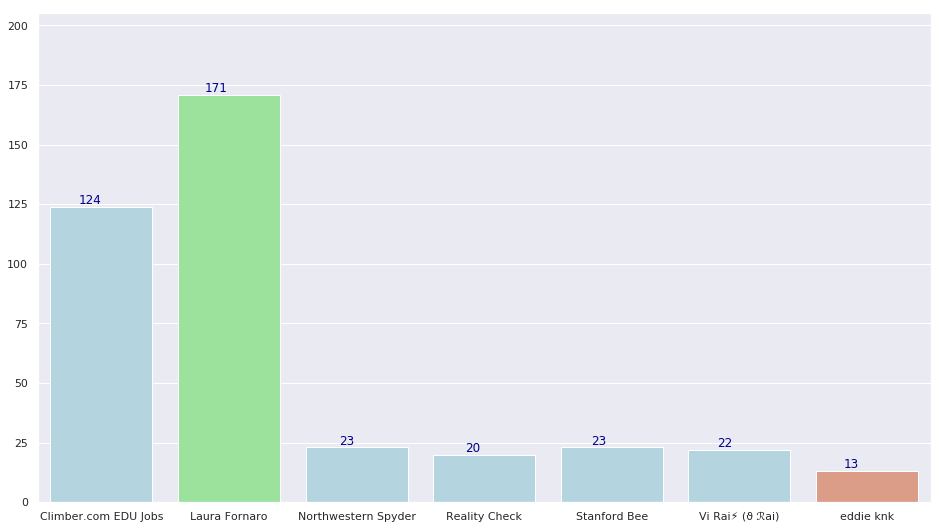

In [63]:
user_subset = user_grp[user_grp["id_str"] > 10]
user_subset.reset_index(drop=True, inplace=True)
f, ax = plt.subplots(1, 1, figsize=(16,9))
plot_bar(data=user_subset, x="user_name", y="id_str", ax=ax)

[USERNAME] Seems to be the most active user with several tweets

### Message Retweet

###### <font color=red> NOTE : CHANGE DATAFRAME TO uni_df WHEN RUNNING ONLINE </font>

In [88]:
user_rt_grp = tweets_df[["user_name", "user_id_str", "retweet_count"]].groupby(by=["user_id_str", "user_name"], as_index=False).sum()
user_rt_grp.reset_index(drop=True, inplace=True)
user_rt_grp.head()

,user_id_str,user_name,retweet_count
0,1.0,81.0,0.000000e+00
1,4.0,0.0,8.220680e+17
2,4.0,2.0,8.220680e+17
3,4.0,3.0,0.000000e+00
4,5.0,111.0,0.000000e+00


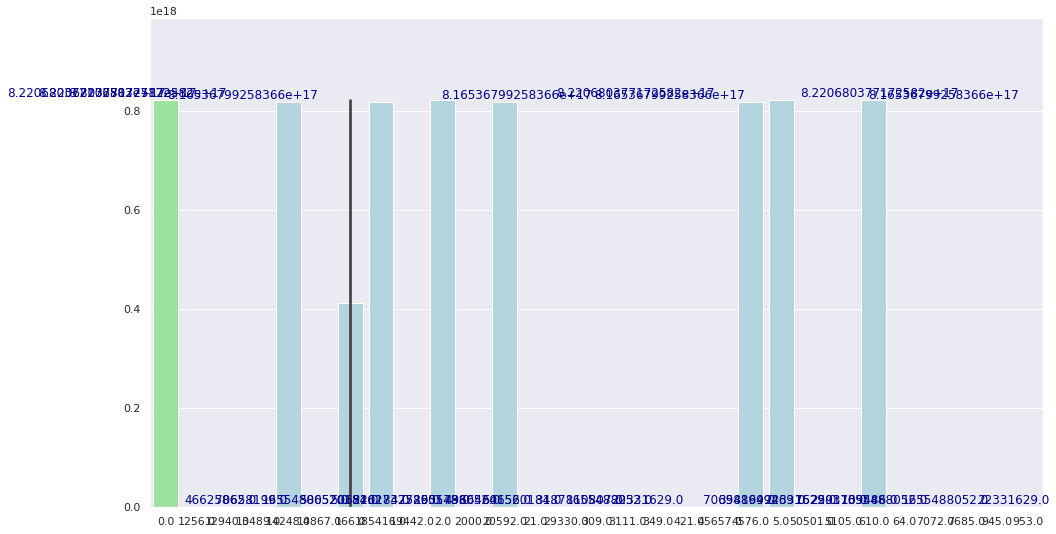

In [89]:
user_rt_subset = user_rt_grp[user_rt_grp["retweet_count"] > 1]
user_rt_subset.reset_index(drop=True, inplace=True)
f, ax = plt.subplots(1, 1, figsize=(16,9))
plot_bar(data=user_rt_subset, x="user_name", y="retweet_count", ax=ax)

### How much are they tweeting about the Universities vs. other topics?

In [124]:
prolific_users = user_subset["user_name"].unique()

In [149]:
cols = ["id_str", "user_id_str", "text", "user_name", "hashtags_cleaned", "uc_tweet", "uic_tweet", "mit_tweet", "stanford_tweet", "upenn_tweet", "nw_tweet", "uni_tweet"]
uvnu_df = tweets_df[tweets_df["user_name"].isin(prolific_users)][cols]
def tmpfun(row):
    if row:
        return 1
    else:
        return 0
uvnu_df["uni_tweet"] = tmpdf["uni_tweet"].apply(tmpfun)
uvnu_df.shape

(514, 12)

In [176]:
tmp_df = uvnu_df[["user_name", "uni_tweet"]].groupby(by="user_name", as_index=False).agg(["sum", "count"])
tmp_df.columns = ["uni_tweets", "total_tweets"]
tmp_df.reset_index(drop=False, inplace=True)
tmp_df["ratio"] = tmp_df["uni_tweets"] / tmp_df["total_tweets"]
tmp_df

,user_name,uni_tweets,total_tweets,ratio
0,Climber.com EDU Jobs,124,192,0.645833
1,Laura Fornaro,171,171,1.000000
2,Northwestern Spyder,23,23,1.000000
3,Reality Check,20,33,0.606061
4,Stanford Bee,23,23,1.000000
5,Vi Rai⚡️ (ϑ ℛai),22,59,0.372881
6,eddie knk,13,13,1.000000


In [ ]:
f, ax = plt.subplots(1,1,figsize=(16,9))
plt

## Location studies

## What distinguishes University of Chicago Twitterers vs Twitterers who tweet about other universities

## Seasonality

## How unique are the messages for each of these universities?